## Elipsoide_Clark_FAT_Teste_Declinacao

## Coisas para importar

In [146]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando import mesher, gridder, utils

import scipy.special
import scipy.interpolate

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [147]:
import Elipsoide_Clark_FAT_Unificado as me5

#### Fatiando a Terra - Ellipsoid

In [148]:
# Malha coordenadas geograficas
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

#xc posicao x , yc posição y e zc profundidade reais
xc = 0
yc = 0
zc = 500.

# Orientacoes do elipsoide
azimuth = 05.
delta = 0.
gamma = 0.

# Eixos do elipsoide
a = np.linspace(50.00001, 3000., 25)
b = 50.00000
c = 49.99999

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 0., 90.    #nT, graus, graus

################################################################################################################################
################################################################################################################################
model1 = []
# Create a ellipsoid model (Triaxial)
for i in range (len(a)):
    model1.append(me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a[i], b, c, azimuth, delta, gamma, 
                              {'remanence': np.array([10000, 0., 25.84]),
                               'k1': np.array([5.5001, 90., 0.]),
                               'k2': np.array([5.5001, 180., 0.]),
                               'k3': np.array([5.5001, 0., 90.])}
                              ))

In [149]:
# Calculate the anomaly for a given regional field (Triaxial)
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model1)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model1)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model1)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model1)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model1)

Bx = np.reshape(Bx, shape)
By = np.reshape(By, shape)
Bz = np.reshape(Bz, shape)
Tf = np.reshape(Tf, shape)

vetor_dec = np.zeros_like(a)
for i in range (len(a)):
    vetor_dec[i] = JRD_cart[i][2]
    
eixo = a/(b+c)

In [150]:
JRD_cart

[[13913.678415807757, 0.0, 88.457776115849427],
 [11507.722395340354, 0.0, 67.989525231550417],
 [13563.179610586592, 0.0, 51.045070944499606],
 [16515.991418158854, 0.0, 40.508696237681171],
 [19493.743497494434, 0.0, 34.203507588469932],
 [22175.289437435327, 0.0, 30.26718115938089],
 [24480.186951080548, 0.0, 27.673594987582121],
 [26422.848971576557, 0.0, 25.880099396863216],
 [28049.007074926507, 0.0, 24.588830738479889],
 [29409.764753340689, 0.0, 23.627723041541611],
 [30551.966104425857, 0.0, 22.892382908931864],
 [31515.406193407907, 0.0, 22.316661297608906],
 [32332.750193218799, 0.0, 21.857034566346634],
 [33030.39405245005, 0.0, 21.483920051647093],
 [33629.538071873852, 0.0, 21.176637077171812],
 [34147.195524235583, 0.0, 20.920369679507676],
 [34597.049498254615, 0.0, 20.704273286659969],
 [34990.148035623795, 0.0, 20.520258357509018],
 [35335.455556441819, 0.0, 20.362188315586042],
 [35640.285501235951, 0.0, 20.225337554294988],
 [35910.638411259242, 0.0, 20.106017685043

## Resultado da minha função

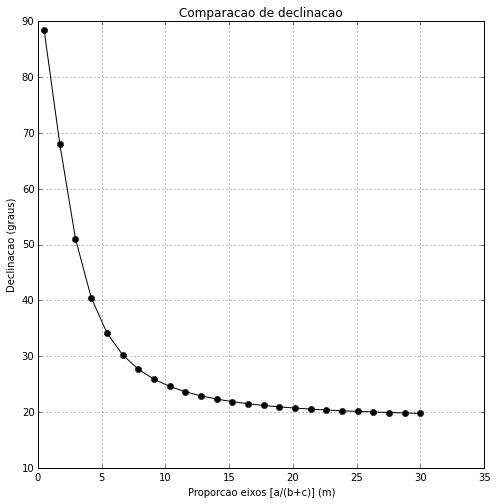

In [151]:
plt.figure(figsize=(8,8))

plt.plot(eixo, vetor_dec, '-ko')
plt.xlabel('Proporcao eixos [a/(b+c)] (m)')
plt.ylabel('Declinacao (graus)')
plt.title('Comparacao de declinacao')
plt.grid(True)
plt.legend()
plt.show()